In [79]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0";

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation

import pandas as pd
import numpy as np
import sys
from kalman_filters import DeepKalmanFilter, KalmanFilter
from tqdm import tqdm
import kalman_filters.ELM as ELM
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [80]:
## DATASET PATH (RELATIVE) (not cross-OS who cares about shitty OS)
dataset_path = 'dataset/'
## Here we are interested in averaged dynamic annotations for both arousal and valence :
annotations_path = 'annotations/'
rating_mode = 'averaged_per_song/' #(per_each_rater/averaged_per_song)
time_continuity_mode = 'dynamic/'#(song_level/dynamic)
full_data_path = dataset_path + annotations_path + rating_mode + time_continuity_mode
## Here is the path to the audio recordings :
audio_path = 'MEMD_audio/'
full_audio_path = dataset_path + audio_path
## Here is the path to where we write the csv
csv_write_path = dataset_path + 'emotion_by_song/'

In [48]:
feature_path = 'features/'

In [49]:
#Arousal data loading
arousal_dataframe = pd.read_csv(full_data_path + 'arousal' + '.csv')
arousal_dataframe.keys()
arousal_dataframe = arousal_dataframe.drop(columns='sample_626500ms')

song_ids = arousal_dataframe[arousal_dataframe.song_id != 146]['song_id'].values

In [74]:
N = 
time_steps = 5

X = np.zeros((0,time_steps,360))
Y = np.zeros((0,2))
#Data preparation
for i in tqdm(range(N)):
    song_id = song_ids[i]
    song = np.load(feature_path + 'song_{}.npz'.format(song_id))
    Y_cur = song['emotion'][::5]
    print(Y_cur.shape)
    X_cur = song['mfb']
    N, C = X_cur.shape
    if X_cur.shape[0] == 300:
        X_cur = X_cur.reshape(N//time_steps, time_steps, C)
        X = np.concatenate((X, X_cur), axis=0)
        Y = np.concatenate((Y, Y_cur), axis=0)
    


 16%|█▌        | 16/100 [00:00<00:00, 157.66it/s]


(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)


 42%|████▏     | 42/100 [00:00<00:00, 135.67it/s]

(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)



 60%|██████    | 60/100 [00:00<00:00, 83.60it/s] 

(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)



 68%|██████▊   | 68/100 [00:00<00:00, 73.53it/s]

(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)



 82%|████████▏ | 82/100 [00:01<00:00, 61.87it/s]

(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)



 89%|████████▉ | 89/100 [00:01<00:00, 57.01it/s]

(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)



100%|██████████| 100/100 [00:01<00:00, 72.10it/s]

(60, 2)
(60, 2)
(60, 2)
(60, 2)
(60, 2)


In [43]:
print(X.shape)
print(Y.shape)

(103560, 5, 360)
(103560, 2)


In [50]:
#Building keras LSTM model
units = 100
output_layer = 2
model = Sequential()

model.add(LSTM(units, input_shape=(time_steps, 360)))
model.add(Dense(output_layer, activation='linear'))
model.compile(loss='mse',optimizer ='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100)               184400    
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 202       
Total params: 184,602
Trainable params: 184,602
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(X,Y,epochs=100,batch_size=5,validation_split=0.05,verbose=1);
scores = model.evaluate(X,Y,verbose=1,batch_size=5)
print('Accurracy: {}'.format(scores[1])) 



Train on 98382 samples, validate on 5178 samples
Epoch 1/100
98382/98382 [==============================] - 298s 3ms/step - loss: 0.0536 - acc: 0.5810 - val_loss: 0.0576 - val_acc: 0.6781
Epoch 2/100
98382/98382 [==============================] - 296s 3ms/step - loss: 0.0484 - acc: 0.5896 - val_loss: 0.0532 - val_acc: 0.7300
Epoch 3/100
98382/98382 [==============================] - 296s 3ms/step - loss: 0.0476 - acc: 0.5938 - val_loss: 0.0539 - val_acc: 0.7236
Epoch 4/100
98382/98382 [==============================] - 296s 3ms/step - loss: 0.0469 - acc: 0.5936 - val_loss: 0.0523 - val_acc: 0.7393
Epoch 5/100
98382/98382 [==============================] - 296s 3ms/step - loss: 0.0466 - acc: 0.5943 - val_loss: 0.0540 - val_acc: 0.7368
Epoch 6/100
98382/98382 [==============================] - 297s 3ms/step - loss: 0.0459 - acc: 0.5975 - val_loss: 0.0526 - val_acc: 0.7599
Epoch 7/100
98382/98382 [==============================] - 296s 3ms/step - loss: 0.0453 - acc: 0.6002 - val_loss: 0.0

In [36]:
N_train = 200 #size of the training set
N_test = 10 #size of the testing set
K = 60 #size of the whole trajectory
D = 2 #dimension of the 
H = 196
L = 1000

A_train, Y_train = np.zeros((N_train, K, D)), np.zeros((N_train, K, H))


for i in range(N_train):
    song_id = song_ids[i]
    song = np.load(feature_path + 'song_{}.npz'.format(song_id))
    if song['emotion'].shape[0] ==  60:
        A_train[i, :, :] = song['emotion']
        Y_train[i, :, :] = song['mfb'][:,::10]


A_test, Y_test = np.zeros((N_test, K, D)), np.zeros((N_test, K, H))

for i in range(N_test):
    song_id = song_ids[N_train + i]
    
    song = np.load(feature_path + 'song_{}.npz'.format(song_id))
    if song['emotion'].shape[0] ==  60:
        A_test[i, :, :] = song['emotion']
        Y_test[i, :, :] = song['mfb'][:,::10]
    else:
        print('problem in {}'.format(song_id))

In [75]:
model.load_weights('myModel.h5')
Y_pred = model.predict(X)
N, M = Y_pred.shape
print(N,M)
Y_pred = Y_pred.reshape(N//60,60,M)
Y_test = Y.reshape(N//60, 60, M)

6000 2


In [38]:
#Parameters to train the transition from state to state
STS_feature_sampling = ELM.normal_features
STS_sampling_dim = (D, L)
STS_sampling_params = [0,1/L]
STS_activation = np.tanh
STS_d_activation = lambda X : 1 - np.square(np.tanh(X))
STS_verbose = False

STS_transition_net = (STS_feature_sampling,
                      STS_sampling_dim,
                      STS_sampling_params,
                      STS_activation,
                      STS_d_activation,
                      STS_verbose
                     )

#Parameters to train the transition from state to observation
STO_feature_sampling = ELM.normal_features
STO_sampling_dim = (D, L)
STO_sampling_params = [0,1/L]
STO_activation = np.tanh 
STO_d_activation = lambda X : 1 - np.square(np.tanh(X))
STO_verbose = False
STO_transition_net = (STO_feature_sampling,
                      STO_sampling_dim,
                      STO_sampling_params,
                      STO_activation,
                      STO_d_activation,
                      STO_verbose)

In [39]:
deep_kalman_filters = DeepKalmanFilter.DeepKalmanFilter(params_path='coucou',
                                                        STS_transition_net=STS_transition_net,
                                                        STO_transition_net=STO_transition_net,
                                                        verbose=False)


In [40]:
linear_kalman_filter = KalmanFilter.KalmanFilter(params_path='coucou',
                                          verbose=False
                                         )
linear_kalman_filter.fit(A = A_train, Y = Y_train, lmbda=0.0001)

In [67]:
deep_kalman_filters.fit(A_train, Y_train, lmbda=1000)

In [42]:
a_0 = A_test[:,0,:]
print(a_0.shape)
P_0 = np.cov(A_train.reshape(N_train*K, D), rowvar=False)

(10, 2)


In [69]:
#a_pred, P_pred = deep_kalman_filters.predict(Y=Y_test, a_0=a_0, P_0=P_0)

100%|██████████| 59/59 [18:39<00:00, 18.97s/it]


In [70]:
print(a_pred.shape)

(10, 60, 2)


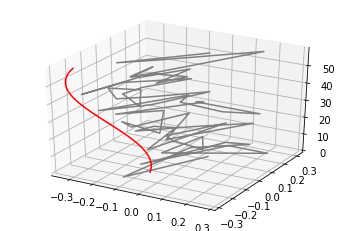

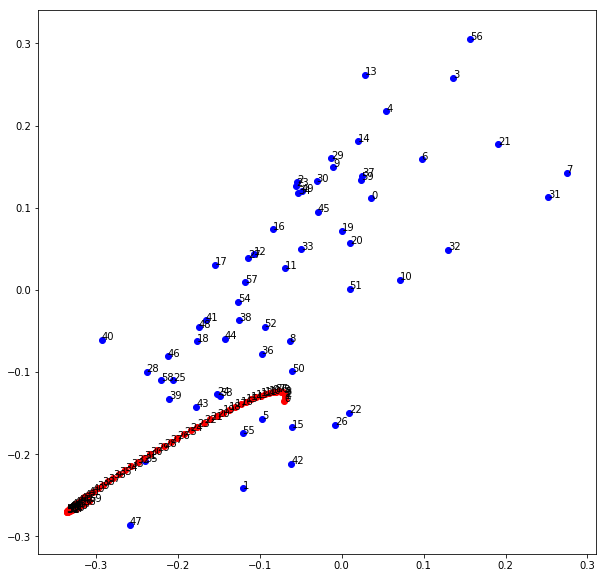

In [76]:
ax = plt.axes(projection='3d')

pred_arousal_trajectory = Y_pred[:,:,0]
pred_valence_trajectory = Y_pred[:,:,1]

gt_arousal_trajectory = Y_test[:,:,0]
gt_valence_trajectory = Y_test[:,:,1]


n = np.arange(60)

trajectory_number = 0
ax.plot3D(pred_arousal_trajectory[trajectory_number], pred_valence_trajectory[trajectory_number], n, 'gray')
ax.plot3D(gt_arousal_trajectory[trajectory_number], gt_valence_trajectory[trajectory_number], n, 'red')




fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(pred_arousal_trajectory[trajectory_number,:], pred_valence_trajectory[trajectory_number,:], color='blue')
ax.scatter(gt_arousal_trajectory[trajectory_number,:], gt_valence_trajectory[trajectory_number,:], color='red')
for i, txt in enumerate(n):
    ax.annotate(txt, (pred_arousal_trajectory[trajectory_number,i], pred_valence_trajectory[trajectory_number,i]))
    ax.annotate(txt, (gt_arousal_trajectory[trajectory_number,i], gt_valence_trajectory[trajectory_number,i]))

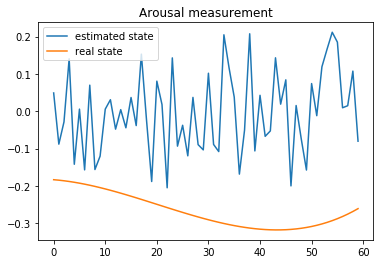

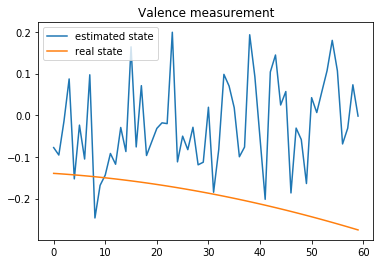

In [78]:
trajectory_number = 1
plt.figure()
plt.title('Arousal measurement')
plt.plot(n, pred_arousal_trajectory[trajectory_number,:], label = 'estimated state')
plt.plot(n, gt_arousal_trajectory[trajectory_number,:], label = 'real state')
plt.legend()
plt.show()

plt.title('Valence measurement')
plt.plot(n, pred_valence_trajectory[trajectory_number,:], label = 'estimated state')
plt.plot(n, gt_valence_trajectory[trajectory_number,:], label = 'real state')
plt.legend()
plt.show()